# Hello World ML
MAD - U CENTRAL - Redes neuronales

In [2]:
# Importar librerías
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

C:\Users\deant\.conda\envs\master1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\deant\.conda\envs\master1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\deant\.conda\envs\master1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\deant\.conda\envs\master1\lib\site-packages\tensorflow\python\frame

In [3]:
np.random.seed(23)
# Crear Eje x
x=np.linspace(-10,10,100)
#Crear Observaciones
y=2*x+3*np.random.normal(0,1,size=len(x))

#Crear DataFrame
datos=pd.DataFrame(np.vstack((x,y)).T, columns=['x','y'])
#Ver datos
datos

,x,y
0,-10.000000,-17.999036
1,-9.797980,-19.518520
2,-9.595960,-21.524777
3,-9.393939,-15.941977
4,-9.191919,-16.278823
...,...,...
95,9.191919,18.960197
96,9.393939,13.618120
97,9.595960,20.575697
98,9.797980,16.339859


In [4]:
# Crear Modelo 

model = keras.Sequential([
    keras.layers.Dense(units=1,input_shape=(1,)) # Capa densa, 1 neurona, 1 dimensión de vectores.
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
# Compilar la red

model.compile(optimizer='sgd', loss='mean_squared_error') # Optimizados sgd, pérdida: ECM

In [6]:
# Resumen de la Red Neuronal

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x, y, epochs=100,verbose=1) # Ajuste del modelo, explicativo x, predecir y, iteración del gradiente descendiente, mostrar mensajes.

Epoch 1/100
100/100 [==============================] - 0s 860us/sample - loss: 157.6852
Epoch 2/100
100/100 [==============================] - 0s 51us/sample - loss: 8.1241
Epoch 3/100
100/100 [==============================] - 0s 45us/sample - loss: 8.2584
Epoch 4/100
100/100 [==============================] - 0s 30us/sample - loss: 8.1567
Epoch 5/100
100/100 [==============================] - 0s 50us/sample - loss: 8.0601
Epoch 6/100
100/100 [==============================] - 0s 60us/sample - loss: 8.2259
Epoch 7/100
100/100 [==============================] - 0s 40us/sample - loss: 8.2585
Epoch 8/100
100/100 [==============================] - 0s 80us/sample - loss: 8.5541
Epoch 9/100
100/100 [==============================] - 0s 120us/sample - loss: 8.1206
Epoch 10/100
100/100 [==============================] - 0s 110us/sample - loss: 8.6148
Epoch 11/100
100/100 [==============================] - 0s 110us/sample - loss: 8.5795
Epoch 12/100
100/100 [==============================] - 0

In [8]:
# Resultados de la RN

w=model.get_weights()

print("\nObjeto Pesos:",w)
print('\nNumber of Weights -> '+ str(len(w)))
print('\nw1 = ' + str(w[0][0]) +'(Weight)')
print('w0 = ' + str(w[1])+'("Weight"->Bias)')
print('\nThe  Regression Model is: y = w1*x+w0:')
print('\ny = {}*x+{}'.format(w[0].item(),w[1].item()))

# Crear Modelo a las Malas
x = np.linspace(x[0],x[-1],100)
# Modelo de regresión
reg = lambda x: np.transpose(w[0]*x+w[1])


Objeto Pesos: [array([[1.9487858]], dtype=float32), array([0.31267455], dtype=float32)]

Number of Weights -> 2

w1 = [1.9487858](Weight)
w0 = [0.31267455]("Weight"->Bias)

The  Regression Model is: y = w1*x+w0:

y = 1.9487857818603516*x+0.31267455220222473


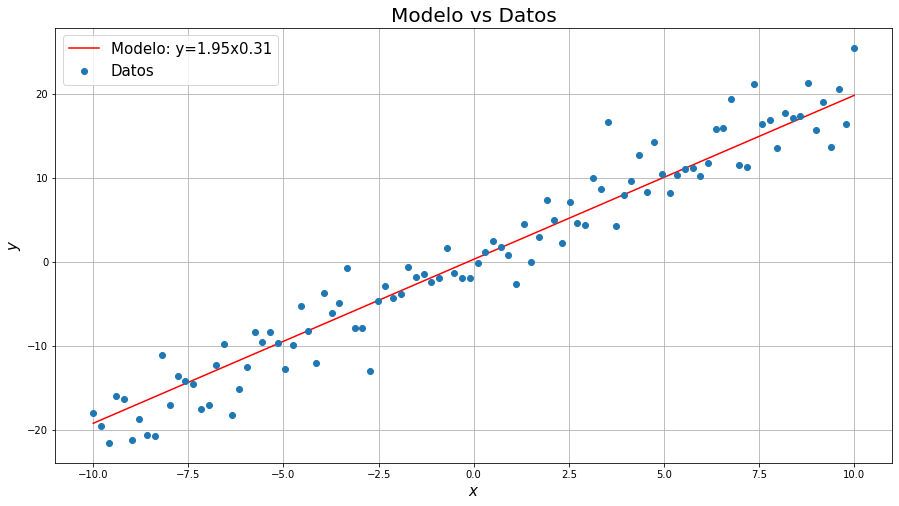

In [13]:
# Visualización de datos

plt.figure(figsize=(15,8))
plt.plot(x,reg(x),'r-',label='Modelo: y={:.2f}x{:.2f}'.format(w[0].item(),w[1].item()))
plt.plot(x,y,'o', label='Datos')
plt.title('Modelo vs Datos',fontsize=20)
plt.xlabel("$x$",fontsize=15)
plt.ylabel("$y$",fontsize=15)
plt.legend(loc=0,fontsize=15)
plt.grid()
plt.show()

 La Predicción en x = 11 es [[21.74932]]


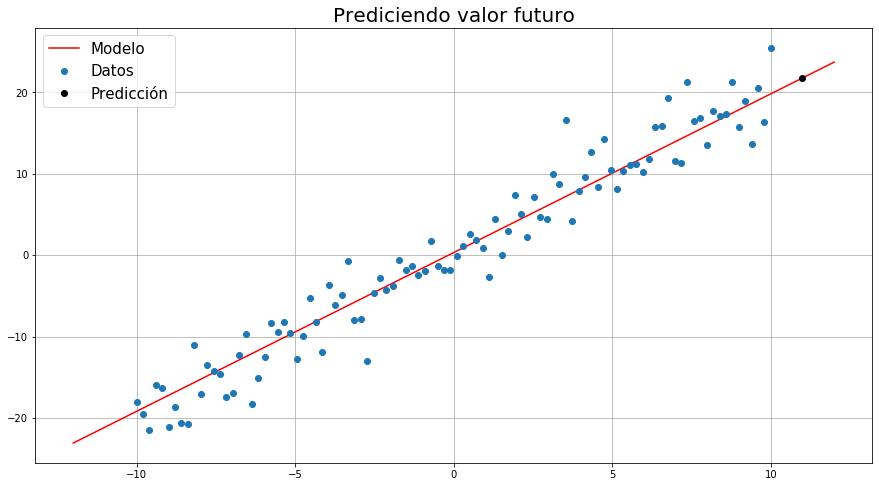

In [11]:
# Predicción

#Punto fuera de los datos de entrenamiento (MUY IMPORTANTE)
x_test=[11.0]

# Predecir valor usando el Modelo generado del entrenamiento
pred = model.predict(x_test)
print(' La Predicción en x = 11 es '+str(pred))

# Aumentar Resolución del Modelo Fuera de los Datos
x_model=np.linspace(-12,12,100)


plt.figure(figsize=(15,8))
plt.plot(x_model,reg(x_model),'r-',label='Modelo')
plt.plot(x,y,'o', label='Datos')
plt.plot(x_test,pred,'ko', label='Predicción')
plt.title('Prediciendo valor futuro',fontsize=20)
plt.legend(loc=0,fontsize=15)
plt.grid()
plt.show()
